In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import scipy as sc
from collections import Counter
import pandas_profiling as pp

In [2]:
data = pd.read_csv('datasets/titanic_data.csv')

print(data.shape)
data.columns

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps

In [ ]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

# Investigation

In [3]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
surv = data['Survived'].value_counts()[0];
nonsurv = data['Survived'].value_counts()[1];

In [5]:
percent_sur = surv/(surv + nonsurv);
percent_nonsur = nonsurv/(surv + nonsurv);

In [6]:
percent_sur

0.6161616161616161

In [7]:
pl1_surv = data[data['Pclass'] == 1]['Survived'].value_counts() # 

In [9]:
pl1_surv

1    136
0     80
Name: Survived, dtype: int64

In [11]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

# Add/Delete row and column

In [18]:
df_copy = df.copy()

Add row

In [19]:
df_copy.loc[df_copy.shape[0]] = ['','','','','','','','','','','',''] 

In [20]:
df_copy.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q
891,,,,,,,,,,,,


delete row

In [21]:
df_copy.drop(df_copy.iloc[[df_copy.shape[0]-1]].index,inplace=True) # inplace = True ใส่เพื่อแสดงผล แล้วเก็บค่า
df_copy.tail()
# df_copy.drop(df_copy[df_copy['Age'] > 35].index,inplace=True) with conditions

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


Add and delete column

In [22]:
df_copy['add example'] = pd.Series(np.random.randn(df_copy.shape[0]))
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,add example
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,2.759648
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,-0.494497
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S,2.037721
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1.086851
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S,0.218213


In [23]:
del df_copy['add example']
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


In [ ]:
#Constant features
df.nunique(axis=1) == 1

In [ ]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = train.nunique(dropna = False)

feats_counts.sort_values()[:10]

In [ ]:
constant_features = feats_counts.loc[feats_counts==1].index.tolist()
print (constant_features)


traintest.drop(constant_features,axis = 1,inplace=True)

In [ ]:
#Duplicated features column
df.T.drop_duplicates()

In [ ]:
#
for f in categorical_features:
    df[f] = raintest[f].factorize()

df.T.drop_duplicates()

In [8]:
nunique = data.nunique(dropna=False)
nunique

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

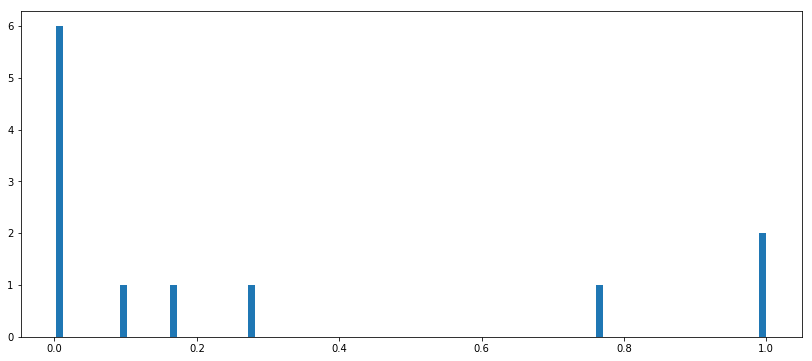

In [10]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/data.shape[0], bins=100)

In [13]:
# Let's take a looks at the features with a huge number of unique values
mask = (nunique.astype(float)/data.shape[0] > 0.8)
data.loc[:, mask].head()

,PassengerId,Name
0,1,"Braund, Mr. Owen Harris"
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,"Allen, Mr. William Henry"
